# Housing Price Prediction - Regression Model

This notebook demonstrates a complete workflow for predicting housing prices using regression models. We will explore the data, preprocess it, engineer features, train multiple models, evaluate their performance, and visualize the results.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Exploration
Let's load the dataset and explore its structure, types, and basic statistics.

In [31]:
# Update the path to your local CSV file
csv_path = r'C:\Users\gmmst\Documents\GitHub\uom_t1_ai_sessions\session-1\machine-learning-part1\Exercise\Housing.csv'
df = pd.read_csv(csv_path)
print(f"Loaded data from: {csv_path}")
df.head()

Loaded data from: C:\Users\gmmst\Documents\GitHub\uom_t1_ai_sessions\session-1\machine-learning-part1\Exercise\Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
# Load the dataset (ensure 'Housing.csv' is in the same directory)
df = pd.read_csv('Housing.csv')

print(f'Dataset shape: {df.shape}')
print("Column names and types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Dataset shape: (545, 13)
Column names and types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

First few rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no      

## 2. Data Preprocessing
We will encode categorical variables and prepare the data for modeling.

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numerical_cols}')

df_processed = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numerical columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Encoded 'mainroad': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'guestroom': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'basement': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'hotwaterheating': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'airconditioning': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'prefarea': {'no': np.int64(0), 'yes': np.int64(1)}
Encoded 'furnishingstatus': {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(2)}


## 3. Feature Engineering & Analysis
Let's analyze feature correlations and visualize the correlation matrix.

Correlation with Price:
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


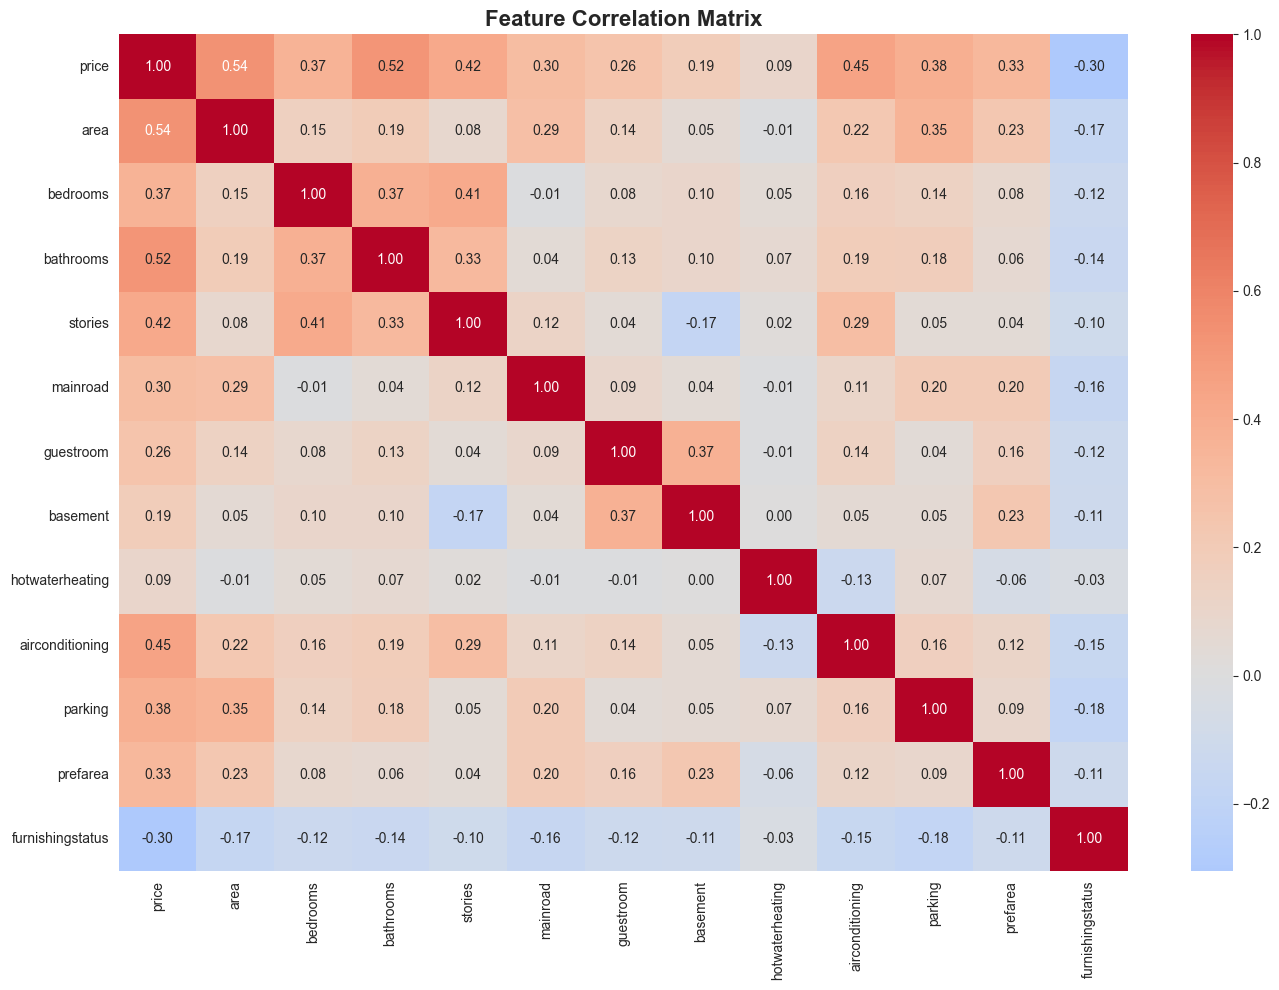

In [34]:
correlation_matrix = df_processed.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(f'Correlation with Price:\n{price_correlation}')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Prepare Data for Modeling
We split the data into features and target, then into training and test sets, and scale the features.

In [35]:
X = df_processed.drop('price', axis=1)
y = df_processed['price']
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Feature names: {list(X.columns)}')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Features shape: (545, 12)
Target shape: (545,)
Feature names: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Training set size: 436 samples
Test set size: 109 samples


## 5. Model Training
We will train three models: Linear Regression, Random Forest, and Gradient Boosting.

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}
results = {}
for name, model in models.items():
    print(f'\nTraining {name}...')
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    results[name] = {
        'model': model,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }
    print(f'  Train R² Score: {train_r2:.4f}')
    print(f'  Test R² Score: {test_r2:.4f}')
    print(f'  Train RMSE: {train_rmse:,.2f}')
    print(f'  Test RMSE: {test_rmse:,.2f}')
    print(f'  Train MAE: {train_mae:,.2f}')
    print(f'  Test MAE: {test_mae:,.2f}')


Training Linear Regression...
  Train R² Score: 0.6854
  Test R² Score: 0.6495
  Train RMSE: 984,836.44
  Test RMSE: 1,331,071.42
  Train MAE: 718,146.60
  Test MAE: 979,679.69

Training Random Forest...
  Train R² Score: 0.9490
  Test R² Score: 0.6126
  Train RMSE: 396,572.63
  Test RMSE: 1,399,300.19
  Train MAE: 280,768.18
  Test MAE: 1,026,574.50

Training Gradient Boosting...
  Train R² Score: 0.9692
  Test R² Score: 0.6192
  Train RMSE: 308,338.90
  Test RMSE: 1,387,358.80
  Train MAE: 235,174.16
  Test MAE: 1,008,500.89


## 6. Model Evaluation and Comparison
Let's compare the models using R², RMSE, and MAE.

In [37]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R2': [results[m]['train_r2'] for m in results],
    'Test R2': [results[m]['test_r2'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results]
})
display(comparison_df)
best_model_name = comparison_df.loc[comparison_df['Test R2'].idxmax(), 'Model']
print(f'Best Model: {best_model_name} (Test R2 = {comparison_df["Test R2"].max():.4f})')

,Model,Train R2,Test R2,Train RMSE,Test RMSE,Test MAE
0,Linear Regression,0.685443,0.649475,984836.442613,1.331071e+06,9.796797e+05
1,Random Forest,0.948995,0.612620,396572.631738,1.399300e+06,1.026575e+06
2,Gradient Boosting,0.969166,0.619203,308338.895381,1.387359e+06,1.008501e+06


Best Model: Linear Regression (Test R2 = 0.6495)


## 7. Visualizations
We visualize model performance and feature importance.

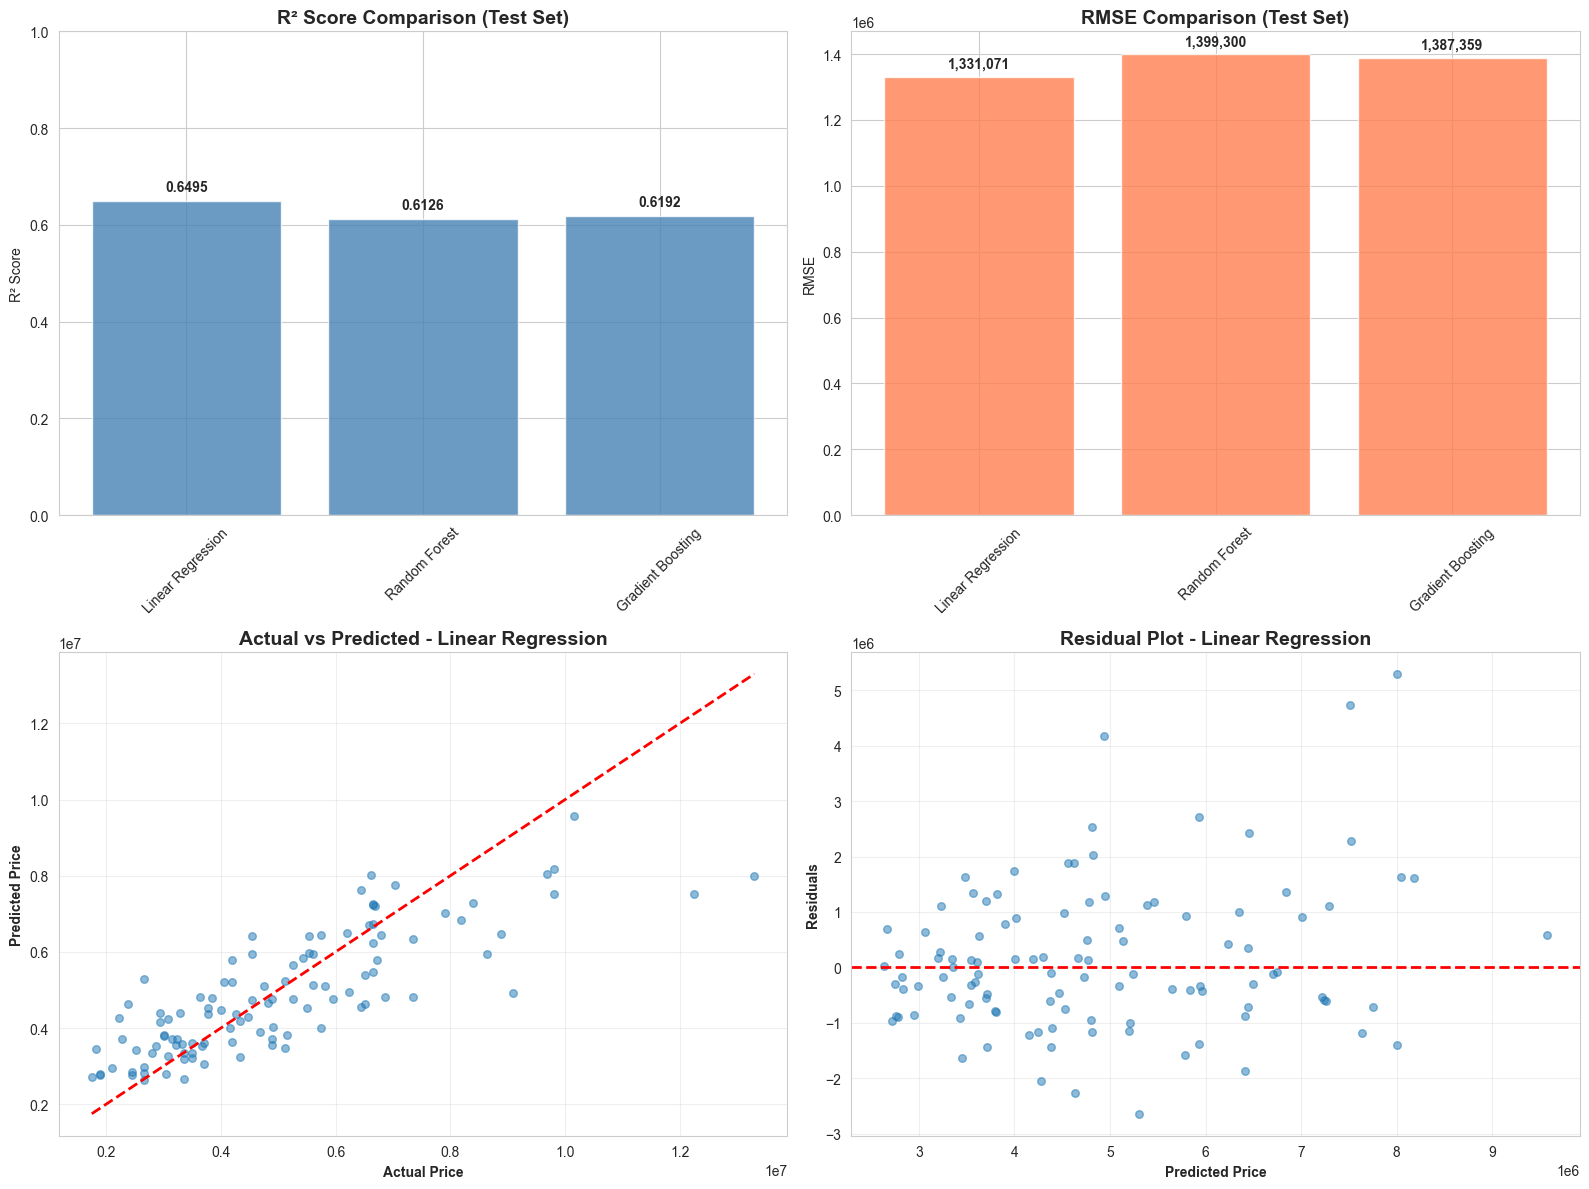

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test R2'], color='steelblue', alpha=0.8)
axes[0, 0].set_title('R² Score Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Test R2']):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test RMSE'], color='coral', alpha=0.8)
axes[0, 1].set_title('RMSE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Test RMSE']):
    axes[0, 1].text(i, v + max(comparison_df['Test RMSE'])*0.02, f'{v:,.0f}', ha='center', fontweight='bold')
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred_test']
axes[1, 0].scatter(y_test, y_pred_best, alpha=0.5, s=30)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price', fontweight='bold')
axes[1, 0].set_ylabel('Predicted Price', fontweight='bold')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
residuals = y_test - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.5, s=30)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Price', fontweight='bold')
axes[1, 1].set_ylabel('Residuals', fontweight='bold')
axes[1, 1].set_title(f'Residual Plot - {best_model_name}', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    display(feature_importance)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score', fontweight='bold')
    plt.tight_layout()
    plt.show()

## 8. Price Distribution
Let's visualize the distribution of house prices.

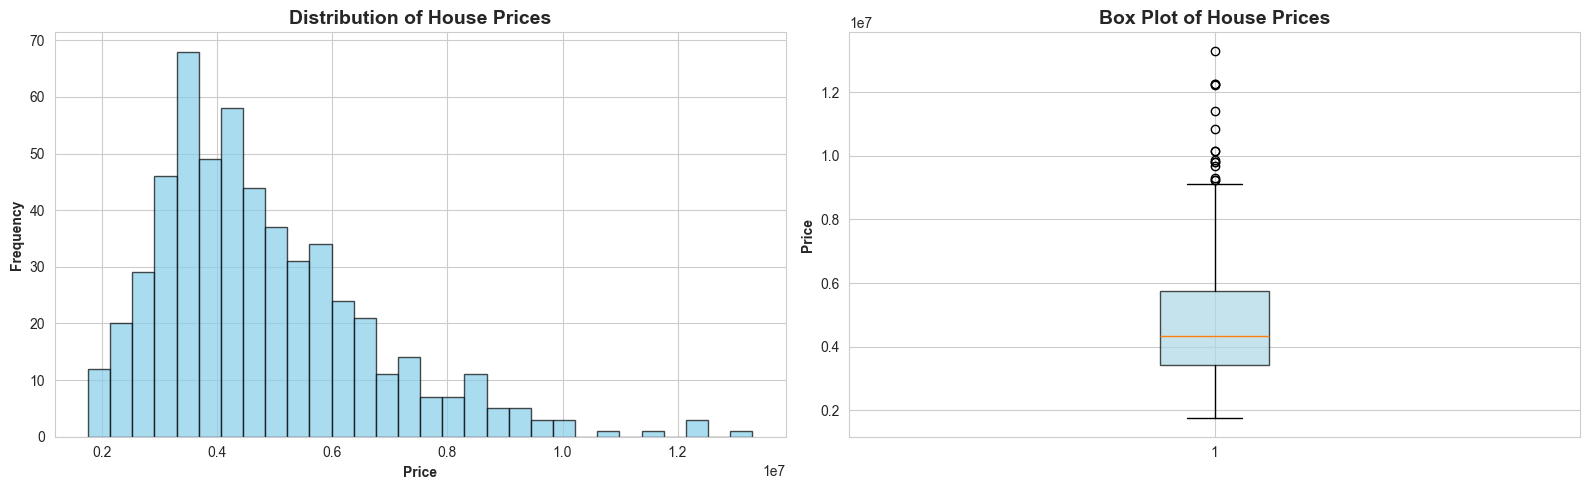

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].hist(y, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[1].boxplot(y, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_ylabel('Price', fontweight='bold')
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Conclusion
We summarize the findings and highlight the best model.

In [40]:
print(f'Best performing model: {best_model_name}')
print(f'Test R² Score: {results[best_model_name]["test_r2"]:.4f}')
print(f'Test RMSE: {results[best_model_name]["test_rmse"]:,.2f}')
print(f'Test MAE: {results[best_model_name]["test_mae"]:,.2f}')
print(f'The model explains {results[best_model_name]["test_r2"]*100:.2f}% of the variance in house prices.')
print(f'On average, predictions are off by {results[best_model_name]["test_mae"]:,.2f} units.')

Best performing model: Linear Regression
Test R² Score: 0.6495
Test RMSE: 1,331,071.42
Test MAE: 979,679.69
The model explains 64.95% of the variance in house prices.
On average, predictions are off by 979,679.69 units.
